# Debopam Das

### Task- As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team. Suggest teams or players a company should endorse for its products.

### collecting necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data(Matches), cleaning and preparation 

In [2]:
raw_data = pd.read_csv(r'C:\Users\DEBOPAM DAS\OneDrive\Desktop\New folder\GRIP_may_21\matches.csv',encoding='latin')

In [3]:
raw_data.shape

(756, 18)

In [4]:
raw_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
raw_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
raw_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
raw_data.drop(['umpire3'],axis=1,inplace=True)

In [8]:
raw_data[raw_data.isnull().any(axis=1)]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak


In [9]:
raw_data.city.fillna('Dubai',inplace=True)
raw_data.winner.fillna('Match Cancelled',inplace=True)
raw_data.player_of_match.fillna('Match Cancelled',inplace=True)
raw_data.umpire1.fillna('Anonymous',inplace=True)
raw_data.umpire2.fillna('Anonymous',inplace=True)

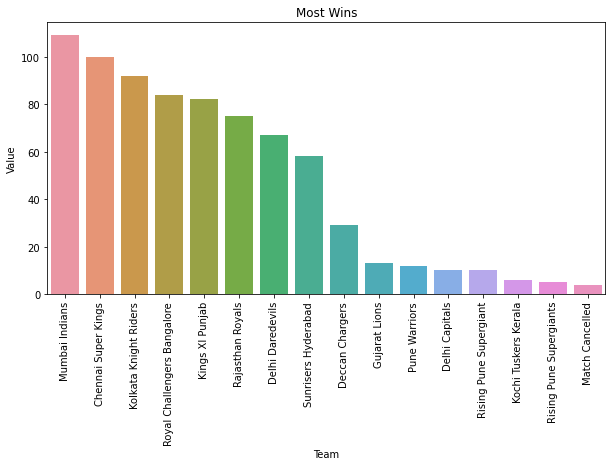

In [10]:
a=raw_data["winner"]
c=a.value_counts()
b=pd.DataFrame({'Team':c.index,'Value':c.values})

plt.figure(figsize=(10,5))
sns.barplot(b["Team"],b["Value"])
plt.title("Most Wins")
plt.xticks(rotation=90)
plt.show()

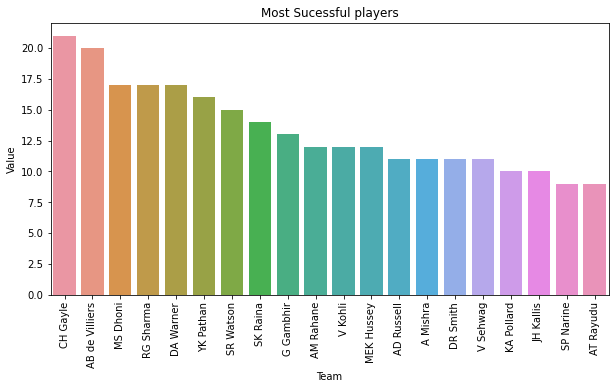

In [11]:
a=raw_data["player_of_match"]
c=a.value_counts().head(20)
b=pd.DataFrame({'Team':c.index,'Value':c.values})

plt.figure(figsize=(10,5))
sns.barplot(b["Team"],b["Value"])
plt.title("Most Sucessful players")
plt.xticks(rotation=90)
plt.show()

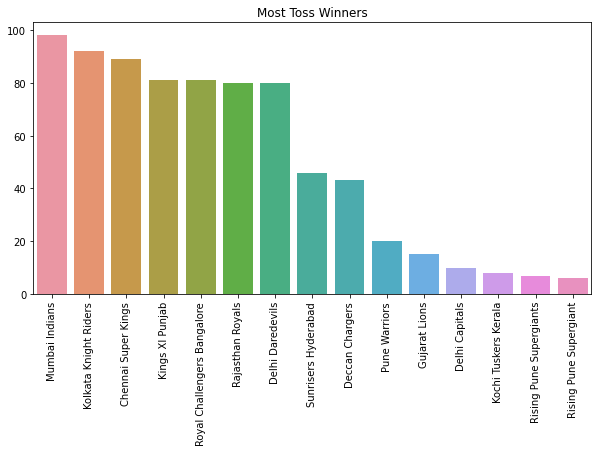

In [12]:
a=raw_data['toss_winner']
b=a.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(b.index,b.values)
plt.xticks(rotation=90)
plt.title("Most Toss Winners")
plt.show()

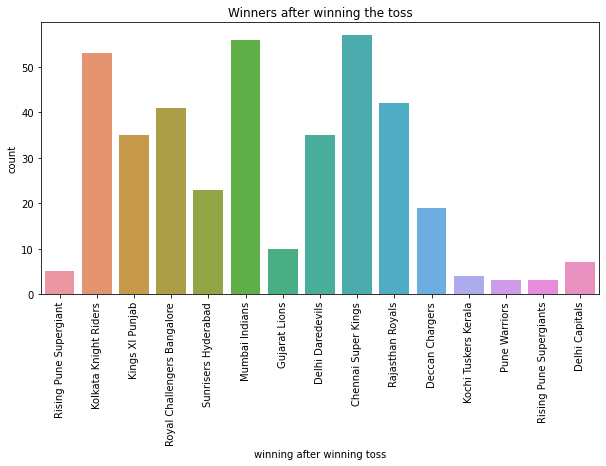

In [13]:
a=raw_data['winner']
b=raw_data['toss_winner']
c=a==b
d=pd.DataFrame({'winning after winning toss':a,'true/false':c})
e=d['winning after winning toss']
f=d['true/false']==True
g=e[f]
plt.figure(figsize=(10,5))
sns.countplot(g)
plt.title("Winners after winning the toss")
plt.xticks(rotation=90)
plt.show()

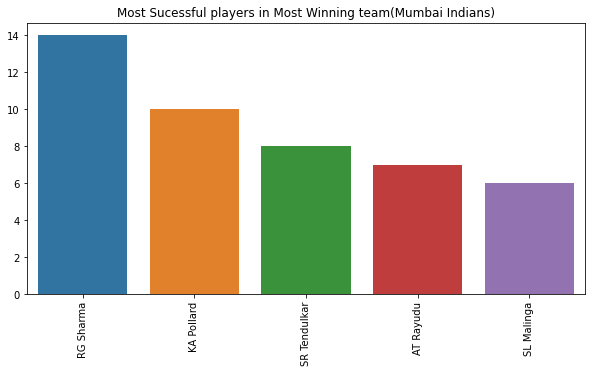

In [14]:
a=raw_data['winner']=='Mumbai Indians'
b=raw_data['player_of_match']
c=b[a]
d=c.value_counts().head()
plt.figure(figsize=(10,5))
sns.barplot(d.index,d.values)
plt.title("Most Sucessful players in Most Winning team(Mumbai Indians)")
plt.xticks(rotation=90)
plt.show()

In [15]:
bat_first=raw_data[raw_data['win_by_runs']!=0]
bat_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Anonymous,Anonymous
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon


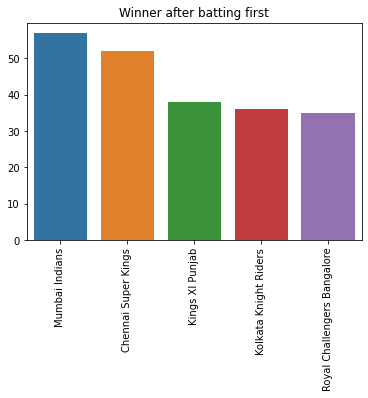

In [16]:
a=bat_first['winner'].value_counts().head()
sns.barplot(a.index,a.values)
plt.xticks(rotation=90)
plt.title('Winner after batting first')
plt.show()

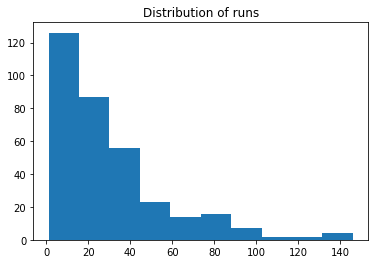

In [17]:
a=bat_first['win_by_runs']
plt.hist(a)
plt.title('Distribution of runs')
plt.show()

In [18]:
ball_first=raw_data[raw_data['win_by_wickets']!=0]
ball_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan


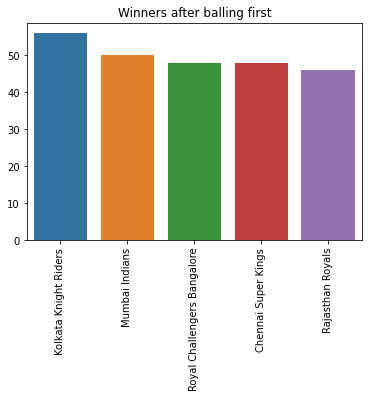

In [19]:
a=ball_first['winner'].value_counts().head()
sns.barplot(a.index,a.values)
plt.title('Winners after balling first')
plt.xticks(rotation=90)
plt.show()

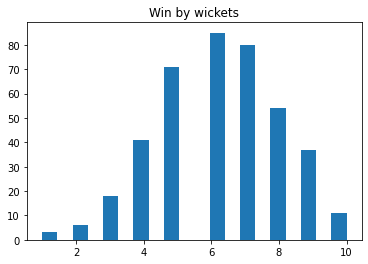

In [20]:
a=ball_first['win_by_wickets']
plt.hist(a,bins=20)
plt.title('Win by wickets')
plt.show()

### Data 2 (Deliveries)

In [21]:
raw_data2=pd.read_csv(r'C:\Users\DEBOPAM DAS\OneDrive\Desktop\New folder\GRIP_may_21\deliveries.csv')

In [22]:
raw_data2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


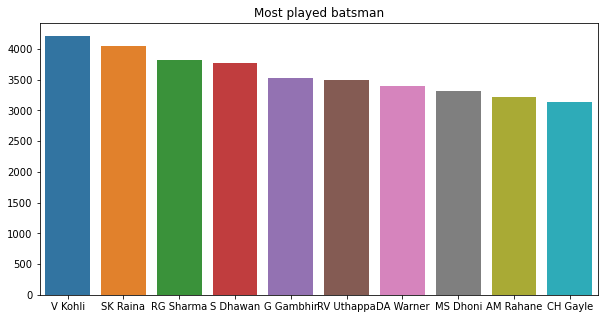

In [23]:
a=raw_data2['batsman'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(a.index,a.values)
plt.title("Most played batsman")
plt.show()

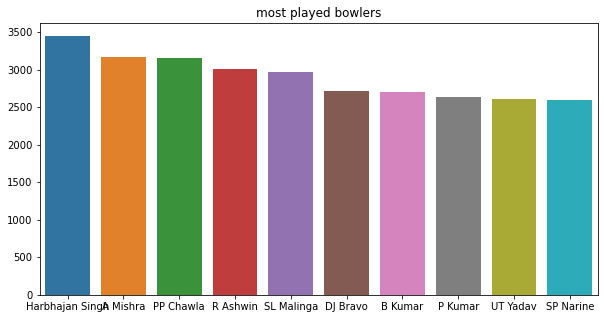

In [24]:
a=raw_data2['bowler'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(a.index,a.values)
plt.title("most played bowlers")
plt.show()

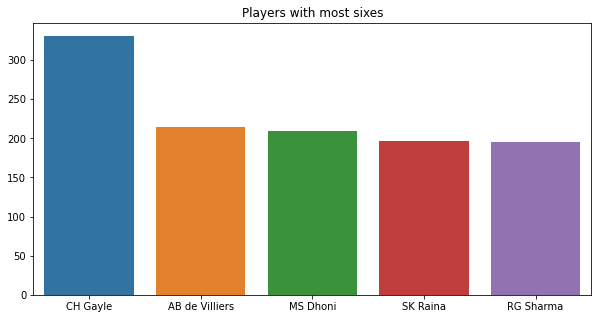

In [25]:
a=raw_data2['total_runs']>=6
b=raw_data2['batsman']
c=b[a].value_counts().head()
plt.figure(figsize=(10,5))
sns.barplot(c.index,c.values)
plt.title("Players with most sixes")
plt.show()

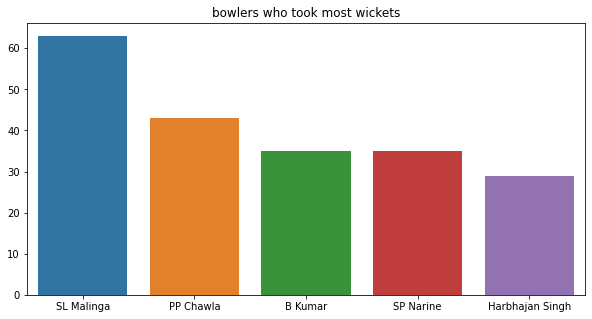

In [26]:
a=raw_data2['dismissal_kind']=='bowled'
b=raw_data2['bowler']
c=b[a].value_counts().head()
plt.figure(figsize=(10,5))
plt.title("bowlers who took most wickets")
sns.barplot(c.index,c.values)
plt.show()

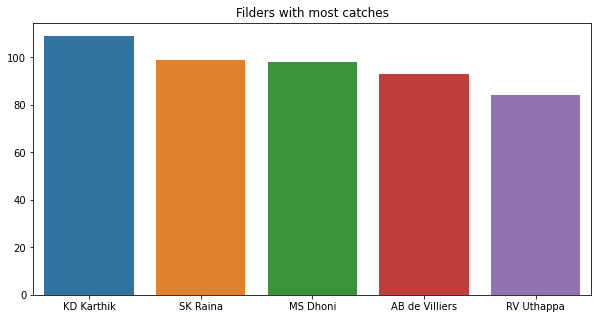

In [27]:
a=raw_data2['dismissal_kind']=='caught'
b=raw_data2['fielder']
c=b[a]
d=c.value_counts().head()
plt.figure(figsize=(10,5))
sns.barplot(d.index,d.values)
plt.title("Filders with most catches")
plt.show()

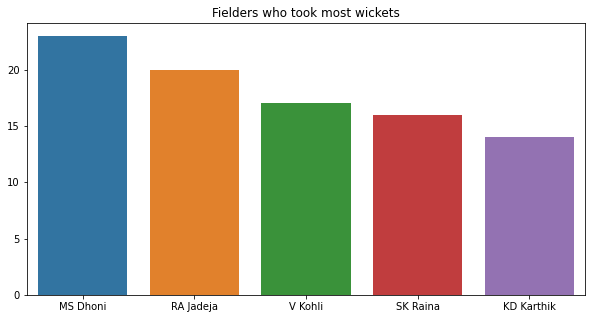

In [28]:
a=raw_data2['dismissal_kind']=='run out'
b=raw_data2['fielder']
c=b[a]
d=c.value_counts().head()
plt.figure(figsize=(10,5))
sns.barplot(d.index,d.values)
plt.title("Fielders who took most wickets")
plt.show()

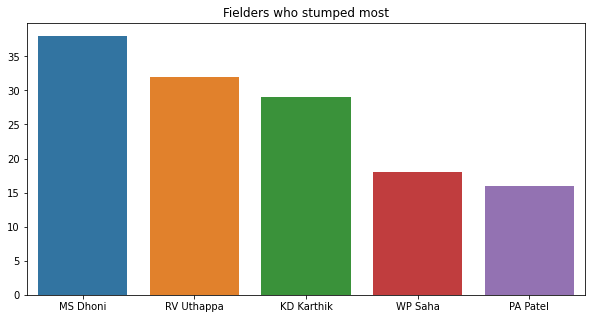

In [29]:
a=raw_data2['dismissal_kind']=='stumped'
b=raw_data2['fielder']
c=b[a]
d=c.value_counts().head()
plt.figure(figsize=(10,5))
sns.barplot(d.index,d.values)
plt.title('Fielders who stumped most')
plt.show()

# Conclusion

### Most Sucessful teams are Mumbai Indians followed by Chennai Super Kings and Kolkata Knight Riders

### Most Sucessful playes are CH Gayle, AB de Villiers, SL Malinga, PP Chawla, KD Kartik, MS Dhoni